# Exercise 1 - Linear Regression
## 1.1 Truck Profit Problem

### Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Read the data

In [2]:
data = pd.read_csv("ex1data1.txt", header = None, names = ["population", "profit"])
X = data.iloc[:, 0]
y = data.iloc[:, 1]
m = len(X)
data.head(5)

population   profit
0      6.1101  17.5920
1      5.5277   9.1302
2      8.5186  13.6620
3      7.0032  11.8540
4      5.8598   6.8233

### Visualize the data

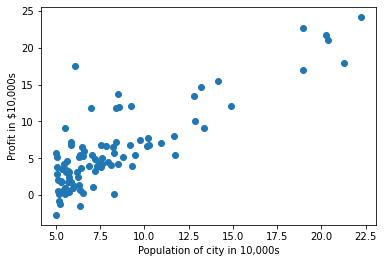

In [3]:
plt.scatter(X, y)
plt.xlabel("Population of city in 10,000s")
plt.ylabel("Profit in $10,000s")
plt.show()

In [4]:
#To convert rank 1 to rank 2 array we use someArray[:,np.newaxis]
X = X[:, np.newaxis]
y = y[:, np.newaxis]
theta = np.zeros([2, 1])
iterations = 1500
alpha = 0.01
ones = np.ones((m, 1))
X = np.hstack((ones, X))

### Cost function

In [5]:
def computeCost(X, y, theta):
    temp = np.dot(X, theta) - y
    return np.sum(np.power(temp, 2)) / (2*m)

#### Cost at inital theta

In [6]:
J = computeCost(X, y, theta)
print("With theta = [0 ; 0]\nCost computed = %f" % J)
print("Expected cost value (approx) 32.07\n\n")

With theta = [0 ; 0]
Cost computed = 32.072734
Expected cost value (approx) 32.07




#### Cost at test theta

In [7]:
theta = [[-1], [2]]
J = computeCost(X, y, theta)
print("With theta = [-1 ; 2]\nCost computed = %f" % J)
print("Expected cost value (approx) 54.24\n\n")

With theta = [-1 ; 2]
Cost computed = 54.242455
Expected cost value (approx) 54.24




### Gradient descent

In [8]:
def gradientDescent(X, y, theta, alpha, iterations):
    for _ in range(iterations):
        temp = np.dot(X, theta) - y
        temp = np.dot(X.T, temp)
        theta = theta - (alpha/m) * temp
    return theta

In [9]:
theta = [[0], [0]] # initialize theta
theta = gradientDescent(X, y, theta, alpha, iterations)
print("Theta found by gradient descent:");
print(" %f\n %f"% (theta[0][0], theta[1][0]));
print("Expected theta values (approx)");
print(" -3.6303\n  1.1664\n\n");

Theta found by gradient descent:
 -3.630291
 1.166362
Expected theta values (approx)
 -3.6303
  1.1664




### Visualize the result

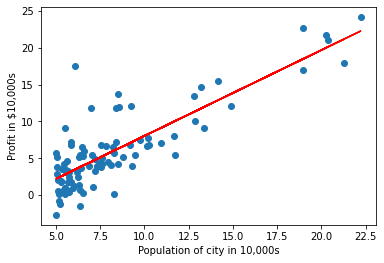

In [10]:
plt.scatter(X[:, 1], y)
plt.xlabel("Population of city in 10,000s")
plt.ylabel("Profit in $10,000s")
plt.plot(X[:, 1], np.dot(X, theta), color = "red")
plt.show()